# MLT Task 1

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

## 1. Different classifiers to predict "Activity"

### Data preprocessing

In [2]:
df = pd.read_csv('bioresponse.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print('Sum of gaps in data =', df.isnull().sum().sum())
df.describe(percentiles=[.1, .25, .5, .75, .9])

Sum of gaps in data = 0


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.452026,0.000000,0.000000,0.110869,0.597933,0.156401,0.191186,0.679051,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,1.000000,0.166667,0.735628,0.150000,0.250000,0.344470,0.792069,0.402596,0.604801,0.849936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
activity_count_df = df.groupby('Activity', as_index=False)['D1'].count().rename(columns={'D1': 'Count'})
fig = px.bar(
    activity_count_df, x='Activity', y='Count',
    title='Count observations per target group',
).update_xaxes(
    tickvals=[0, 1]
)
fig.show()

In [5]:
# train test split
X = df[df.columns[1:]]
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Small Decision Tree

In [6]:
sdt = tree.DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [2,3,4,5,6], # depth of the tree
    'min_samples_split': [10,20,30,40,50], 
    'min_samples_leaf': [5,10,15,20], 
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

In [7]:
grid_search = GridSearchCV(sdt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [5, 10, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [8]:
best_sdt = grid_search.best_estimator_
print("Best params for small decision tree:", grid_search.best_params_)


Best params for small decision tree: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [9]:
y_pred = best_sdt.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7484008528784648

### Deep Decision Tree

In [10]:
ddt = tree.DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': np.arange(10, 51, 5),
    'min_samples_split': [5,10,20,30,40,50],
    'min_samples_leaf': [5,10,15,20], 
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

In [11]:
grid_search = GridSearchCV(ddt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': array([10, 15..., 40, 45, 50]), 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [5, 10, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [12]:
best_ddt = grid_search.best_estimator_
print("Best params for deep decision tree:", grid_search.best_params_)

Best params for deep decision tree: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [13]:
y_pred = best_ddt.predict(X_test)
metrics.accuracy_score(y_test, y_pred)  

0.7356076759061834

### Random Forest on Small Trees

In [14]:
srf = RandomForestClassifier(n_estimators=50, random_state=42)

param_grid = {
    'max_depth': [2,3,4,5,6], # depth of the tree
    'min_samples_split': [10,20,30,40,50], 
    'min_samples_leaf': [5,10,15,20], 
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

In [15]:
grid_search = GridSearchCV(srf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [5, 10, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [16]:
best_srf = grid_search.best_estimator_
print("Best params for random forest on small trees:", grid_search.best_params_)


Best params for random forest on small trees: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [17]:
y_pred = best_srf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7771855010660981

### Random Forest on Deep Trees

In [18]:
drf = RandomForestClassifier(n_estimators=50, random_state=42)

param_grid = {
    'max_depth': [10,15,20],
    'min_samples_split': [5,10,20,30,40,50],
    'min_samples_leaf': [5,10,15,20], 
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

In [19]:
grid_search = GridSearchCV(drf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [10, 15, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [5, 10, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [20]:
best_drf = grid_search.best_estimator_
print("Best params for random forest on deep trees:", grid_search.best_params_)


Best params for random forest on deep trees: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [21]:
y_pred = best_drf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7835820895522388

## 2. Metrics

In [57]:
def classification_metrics(estimator, X_test, y_test, name, threshold=None):
    if not threshold:
        y_pred = estimator.predict(X_test)
    else:
        y_proba = estimator.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)

    accuracy = round(metrics.accuracy_score(y_test, y_pred), 4)
    recall = round(metrics.recall_score(y_test, y_pred), 4)
    precision = round(metrics.precision_score(y_test, y_pred), 4)
    f1 = round(metrics.f1_score(y_test, y_pred), 4)
    log_loss = round(metrics.log_loss(y_test, y_pred), 2)

    return [name, accuracy, precision, recall, f1, log_loss]

In [62]:
results = pd.DataFrame(columns=['estimator', 'accuracy', 'precision', 'recall', 'f1-score', 'log-loss'])

estimators = {
    'small decision tree': best_sdt,
    'deep decision tree': best_ddt,
    'random forest on small trees': best_srf,
    'random forest on deep trees': best_drf
}

for estimator_name in estimators:
    results.loc[len(results)] = classification_metrics(estimators[estimator_name], X_test, y_test, estimator_name)

print('Classification Metrics')
results

Classification Metrics


,estimator,accuracy,precision,recall,f1-score,log-loss
0,small decision tree,0.7484,0.7753,0.7869,0.7811,9.07
1,deep decision tree,0.7356,0.7549,0.7944,0.7741,9.53
2,random forest on small trees,0.7772,0.7932,0.8243,0.8084,8.03
3,random forest on deep trees,0.7836,0.8040,0.8206,0.8122,7.80


## 3. Precision-Recall and ROC curves

In [72]:
# precision-recall
def precision_recall(estimator, X_test, y_test):
    pred_proba = estimator.predict_proba(X_test)

    return metrics.precision_recall_curve(y_test, pred_proba[:, 1], drop_intermediate=True)

# roc
def roc(estimator, X_test, y_test):
    pred_proba = estimator.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba[:, 1])

    return fpr, tpr, thresholds, metrics.roc_auc_score(y_test, pred_proba[:, 1])

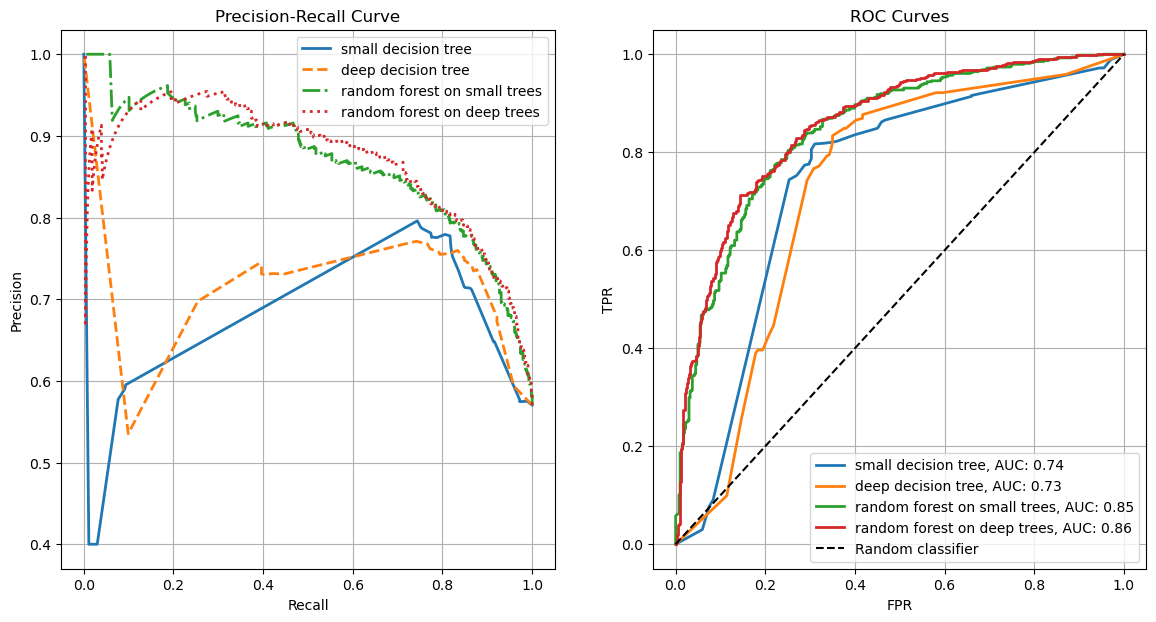

In [73]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))

markers = ['.', 'o', 'v', '*']
linestyles = ['-', '--', '-.', ':']

# precision-recall curve
for i, estimator_name in enumerate(estimators):
    precision, recall, thresholds = precision_recall(estimators[estimator_name], X_test, y_test)

    ax1.plot(
        recall, precision, 
        linestyle=linestyles[i], linewidth=2,
        label=estimator_name
    )

ax1.set_title(f'Precision-Recall Curve')
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.grid()
ax1.legend()

# roc curves with auc
for i, estimator_name in enumerate(estimators):
    fpr, tpr, thresholds, auc = roc(estimators[estimator_name], X_test, y_test)

    ax2.plot(
        fpr, tpr, 
        linewidth=2,
        label=f'{estimator_name}, AUC: {auc:.2f}'
    )

ax2.plot([0, 1], [0, 1], 'k--', label='Random classifier')

ax2.set_title(f'ROC Curves')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.grid()
ax2.legend()

plt.show()

## 4. Classifier without False Negative errors

In [53]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
y_proba = model.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 1000)
best_threshold = 0.5

for threshold in thresholds:
    y_pred_custom = (y_proba >= threshold).astype(int)
    recall = metrics.recall_score(y_test, y_pred_custom)
    if recall >= 0.95:
        best_threshold = threshold

print(f"Threshold for Recall >= 0.95: {best_threshold:.3f}")

Threshold for Recall >= 0.95: 0.309


In [ ]:
results.loc[len(results)] = classification_metrics(
    model, X_test, y_test, 
    'random forest (avoids FN)', 
    best_threshold
)
results

,estimator,accuracy,precision,recall,f1-score,log-loss
0,small decision tree,0.7484,0.7753,0.7869,0.7811,9.07
1,deep decision tree,0.7356,0.7549,0.7944,0.7741,9.53
2,random forest on small trees,0.7772,0.7932,0.8243,0.8084,8.03
3,random forest on deep trees,0.7836,0.8040,0.8206,0.8122,7.80
4,random forest (avoids FN),0.7377,0.6966,0.9570,0.8063,9.45
